# WAN Ching Pui,  20349359

# MNIST (100 points)
In this problem, we will implement a model to classify digits using the MNIST
dataset. The dataset is available at http://yann.lecun.com/exdb/mnist/.
Please download both training and test sets. You can train your model for 20
epochs. Use a batch size of 64 to train the model. Please submit a report
and code for this assignment. You can use Tensorflow and Pytorch in this
assignment.

In [1]:
import torchvision.datasets as dsets
from torchvision import transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(0)
num_epoch=20
batch_size=64
device='cuda'
data_root='./data'
train_set=dsets.MNIST(data_root,train=True,download=True,transform=transforms.ToTensor())
test_set=dsets.MNIST(data_root,train=False,download=True,transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)


In [2]:
#helper function
import time
class Timer(object):
    def __init__(self, name=None):
        self.name = name

    def __enter__(self):
        self.tstart = time.time()

    def __exit__(self, type, value, traceback):
        if self.name:
            print('[%s]' % self.name,)
        print('Elapsed: %s' % (time.time() - self.tstart))

## K Nearest Neighbors (KNN) (25 points)
We will implement a K-nearest neighbor model that finds the most similar image
given a test image. We can use the scikit-learn Python library to find the KNN.
We will use the sum of absolute difference (SAD) on all the pixels to measure
the similarity between two images. What will be the accuracy if we find the
nearest neighbor? What will be the accuracy if we find K neighbors? When
we find K, we choose the label that appears most among the KNN images (if
there is a tie, we pick the one with the smallest aggregated SAD). Plot a curve
of accuracy versus K from 1 to 10.


In [0]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [0]:
X_=train_set.data.numpy()
X=X_.reshape([-1,28*28])
np.testing.assert_array_equal(X_[0],(X[0].reshape([28,28])))
y=train_set.targets.numpy()

X_test=test_set.data.numpy().reshape([-1,28*28])
y_test=test_set.targets.numpy()

In [56]:
%%time

accuracy=[]
K=list(range(1,11))
for k in K:
  with Timer():
    classifier=KNN(n_neighbors=k,p=1).fit(X,y)
    score=classifier.score(X_test,y_test)
    accuracy.append(score)
    print('K=%d,\t accuracy=%.2f'%(k,score))

K=1,	 accuracy=0.96
Elapsed: 802.2946751117706
K=2,	 accuracy=0.95
Elapsed: 803.3404867649078
K=3,	 accuracy=0.96
Elapsed: 804.2315666675568
K=4,	 accuracy=0.96
Elapsed: 799.2401945590973
K=5,	 accuracy=0.96
Elapsed: 801.9481177330017
K=6,	 accuracy=0.96
Elapsed: 799.5685656070709
K=7,	 accuracy=0.96
Elapsed: 816.9312310218811
K=8,	 accuracy=0.96
Elapsed: 840.5349388122559
K=9,	 accuracy=0.96
Elapsed: 856.0809323787689
K=10,	 accuracy=0.96
Elapsed: 852.5900988578796
CPU times: user 2h 16min 4s, sys: 2.65 s, total: 2h 16min 7s
Wall time: 2h 16min 16s


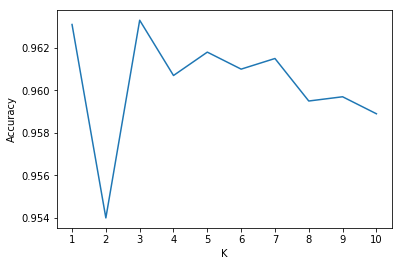

In [57]:
plt.plot(K,accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(K)
plt.show()

## Multilayer Perceptron (MLP) (25 points)
Treat each image as a 784d (28 × 28) vector. Train a multilayer perceptron
model to classify images. Use two hidden layers (not including the input layer
and the output layers). Each hidden layer is a fully connected layer followed by
ReLU (Rectified Linear Unit f(x) = max(0, x)). The final layer should output
10 numbers indicating the scores of the 10 classes. Try cross-entropy loss for
the classification<sup>1</sup>
. We can experiment with different neurons in the hidden
layers. What is the accuracy of such a model? Plot a curve of accuracy versus
the number of neurons: 4, 8, 16, 32, 64, 128, and 256. We assume both hidden
layers have the same neurons.

---
<sup>1</sup>
In Tensorflow, we can use https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits

In [0]:
def train(net,train_loader,criterion,optimizer,device):
    net.to(device)
    for idx, (data,target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()   
        output = net(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    
def test(net,test_loader,device,message_prefix):
    net.to(device)
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            target = target.to(device)
            outputs = net(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy=correct / total
    print('%s\tAccuracy: %.2f' % (message_prefix,accuracy))
    return accuracy

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Mlp(nn.Module):
    def __init__(self,n):
        super(Mlp, self).__init__()
        self.fc1 = nn.Linear(28*28, n)
        self.fc2 = nn.Linear(n, n)
        self.fc3 = nn.Linear(n, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

In [8]:
num_neurons=[4,8,16,32,64,128,256]
accuracy=[]
for n in num_neurons:
  with Timer():

    net=Mlp(n)
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epoch):
      train(net,train_loader,criterion,optimizer,device)
    score=test(net,test_loader,device,'[Number of neurons =%d]'%n)
    accuracy.append(score)
    print(score)


[Number of neurons =4]	Accuracy: 0.47
0.4745
Elapsed: 146.32275795936584
[Number of neurons =8]	Accuracy: 0.83
0.8281
Elapsed: 139.607031583786
[Number of neurons =16]	Accuracy: 0.73
0.7332
Elapsed: 140.1396040916443
[Number of neurons =32]	Accuracy: 0.94
0.9415
Elapsed: 140.62085556983948
[Number of neurons =64]	Accuracy: 0.95
0.9545
Elapsed: 141.40154314041138
[Number of neurons =128]	Accuracy: 0.86
0.8643
Elapsed: 141.05031609535217
[Number of neurons =256]	Accuracy: 0.87
0.866
Elapsed: 141.4726049900055


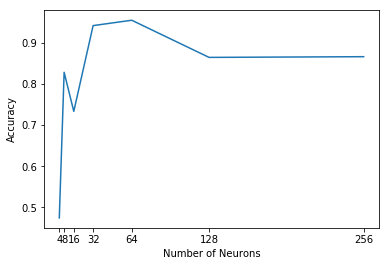

In [10]:
plt.plot(num_neurons,accuracy)
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.xticks(num_neurons)
plt.show()

## Convolutional Neural Networks (CNN) (25 points)
Implement the LeNet-5 convolutional neural network. You can follow this tutorial for the details of the LeNet: https://engmrk.com/lenet-5-a-classic-cnn-architecture/.
Please use input image size 28×28 in your model, although the input image size
in the original LeNet-5 model is 32 × 32. What is the accuracy of the LeNet-5
model?


In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0,
#dilation=1, groups=1, bias=True, padding_mode='zeros')

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Conv2d(1, 6, kernel_size=5, stride=1,padding=2)
        self.layer2 = nn.AvgPool2d(2)
        self.layer3 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.layer4 = nn.AvgPool2d(2)
        self.layer5 = nn.Conv2d(16, 120, kernel_size=5, stride=1)
        self.layer6 = nn.Linear(120, 84)
        self.layer_out = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = torch.tanh(self.layer3(x))
        x = torch.tanh(self.layer4(x))
        x = torch.tanh(self.layer5(x))
        x = x.view(x.size(0), -1)
        x = torch.tanh(self.layer6(x))
        x = self.layer_out(x)
        return x

In [13]:
%%time
with Timer():
  net=CNN()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
  criterion = nn.CrossEntropyLoss()
  for epoch in range(num_epoch):
    train(net,train_loader,criterion,optimizer,device)
    score=test(net,test_loader,device,'[Epoch #%d]'%epoch)
  accuracy.append(score)
  print(score)


[Epoch #0]	Accuracy: 0.72
[Epoch #1]	Accuracy: 0.87
[Epoch #2]	Accuracy: 0.90
[Epoch #3]	Accuracy: 0.91
[Epoch #4]	Accuracy: 0.93
[Epoch #5]	Accuracy: 0.94
[Epoch #6]	Accuracy: 0.94
[Epoch #7]	Accuracy: 0.95
[Epoch #8]	Accuracy: 0.96
[Epoch #9]	Accuracy: 0.96
[Epoch #10]	Accuracy: 0.96
[Epoch #11]	Accuracy: 0.97
[Epoch #12]	Accuracy: 0.97
[Epoch #13]	Accuracy: 0.97
[Epoch #14]	Accuracy: 0.97
[Epoch #15]	Accuracy: 0.97
[Epoch #16]	Accuracy: 0.98
[Epoch #17]	Accuracy: 0.98
[Epoch #18]	Accuracy: 0.98
[Epoch #19]	Accuracy: 0.98
0.9801
Elapsed: 184.1438353061676
CPU times: user 3min, sys: 2.36 s, total: 3min 3s
Wall time: 3min 4s


## Context Aggregation Networks (CAN) (25 points)
We can also implement a simple CNN model with dilated convolutions. We can
have a model with a large receptive field with the same spatial resolution in the
hidden layers. See the network architecture in the Table 1. For your information,
the dilated residual network <sup>2</sup>
is a similar model for image classification.
What is the accuracy of such a CAN model? What will be the accuracy if
we use a different number of feature channels instead of 32?








|Operation |3 × 3 conv |3 × 3 conv |3 × 3 conv |3 × 3 conv |3 × 3 conv |Avg pool|
|:---------|:---------:|:---------:|:---------:|:---------:|:---------:|:------:|
|Activation |LReLU |LReLU |LReLU |LReLU |LRelU |N/A|
|Dilation |1 |2 |4 |8 |1 |N/A|
|Receptive field |3 × 3 |7 × 7 |15 × 15 |31 × 31 |33 × 33 |N/A|
|Feature channels |32 |32 |32 |32 |10 |10|

Table 1: The CAN model. The average pooling is a global average pooling that outputs a 10-dimensional vector.


---
<sup>2</sup> Fisher Yu, Vladlen Koltun, and Thomas A. Funkhouser, ”Dilated Residual Networks,”
CVPR 2017


In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0,
#dilation=1, groups=1, bias=True, padding_mode='zeros')

class CAN(nn.Module):
    def __init__(self,c=32):
        super(CAN, self).__init__()
        self.layer1 = nn.Conv2d(1, c, 3, dilation=1, padding=3)
        self.layer2 = nn.Conv2d(c, c, 3, dilation=2, )
        self.layer3 = nn.Conv2d(c, c, 3, dilation=4, )
        self.layer4 = nn.Conv2d(c, c, 3, dilation=8, )
        self.layer5 = nn.Conv2d(c, 10, 3, dilation=1, )
        self.layer6 = nn.AdaptiveAvgPool2d(1)
        
    def forward(self, x):
        x = nn.LeakyReLU()(self.layer1(x))
        x = nn.LeakyReLU()(self.layer2(x))
        x = nn.LeakyReLU()(self.layer3(x))
        x = nn.LeakyReLU()(self.layer4(x))
        x = nn.LeakyReLU()(self.layer5(x))
        x = self.layer6(x)
        x = x.view(x.size(0),-1)
        return x

In [51]:
%%time
number_of_channels=[1,4,16,32,64]
accuracy=[]
for c in number_of_channels:
  with Timer():
    net=CAN(c)
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epoch):
      train(net,train_loader,criterion,optimizer,device)
    score=test(net,test_loader,device,'[Number of fearture channels =%d]'%c)
    accuracy.append(score)
    print(score)


[Number of fearture channels =1]	Accuracy: 0.11
0.1135
Elapsed: 169.43554782867432
[Number of fearture channels =4]	Accuracy: 0.91
0.91
Elapsed: 170.2195165157318
[Number of fearture channels =16]	Accuracy: 0.98
0.977
Elapsed: 247.53215074539185
[Number of fearture channels =32]	Accuracy: 0.98
0.9803
Elapsed: 629.4414234161377
[Number of fearture channels =64]	Accuracy: 0.98
0.9846
Elapsed: 2274.0257329940796
CPU times: user 38min 20s, sys: 19min 40s, total: 58min
Wall time: 58min 10s


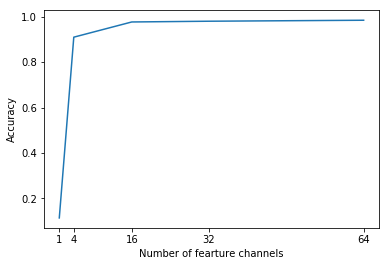

In [53]:
plt.plot(number_of_channels,accuracy)
plt.xlabel('Number of fearture channels')
plt.ylabel('Accuracy')
plt.xticks(number_of_channels)
plt.show()